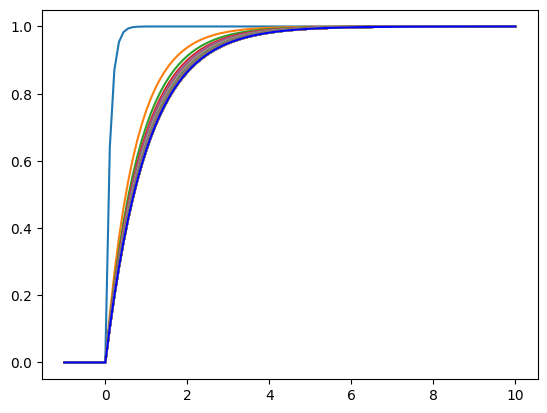

In [18]:
# Convergence in distribution
# F(x,n) = (1-(1-1/n)^nx if x>0
# lim F(x,n) = 1-e^{-x} as n-> inf

import matplotlib.pyplot as plt
import numpy as np

def F(x, n): # CDF
    e = 0.0001
    return np.where(x>0,1-(1-1/n+e)**(n*x),0)

x = np.linspace(-1,10,100) # Support
for n in range(1,100): # increase n
    plt.plot(x, F(x, n))

from scipy.stats import expon
plt.plot(x, expon.cdf(x, 0, 1), c = 'b')
plt.show()

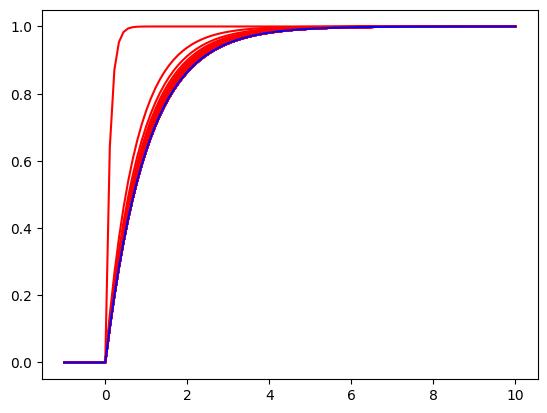

In [32]:
# Convergence in distribution
# F(x,n) = (1-(1-1/n)^nx if x>0
# lim F(x,n) = 1-e^{-x} as n-> inf

import matplotlib.pyplot as plt
import numpy as np

def F(x, n): # CDF
    e = 0.0001
    return np.where(x>0,1-(1-1/n+e)**(n*x),0)

x = np.linspace(-1,10,100) # Support
for n in range(1,100): # increase n
    plt.plot(x, F(x, n), c='r')

from scipy.stats import expon
plt.plot(x, expon.cdf(x, 0, 1), c='b')
plt.show()

[]

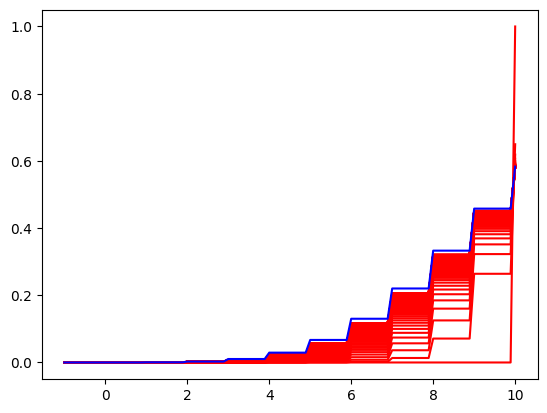

In [34]:
# Convergence in distribution
# Binomial(n,a/n) -> Poi(a)
from scipy.stats import binom
from scipy.stats import poisson

a = 10
x = np.linspace(-1,10,100) # Support
for n in range(1,100): # increase n
    plt.plot(x, binom.cdf(x, n, a/n), c='r')
plt.plot(x, poisson.cdf(x, a), c='b')
plt.plot()

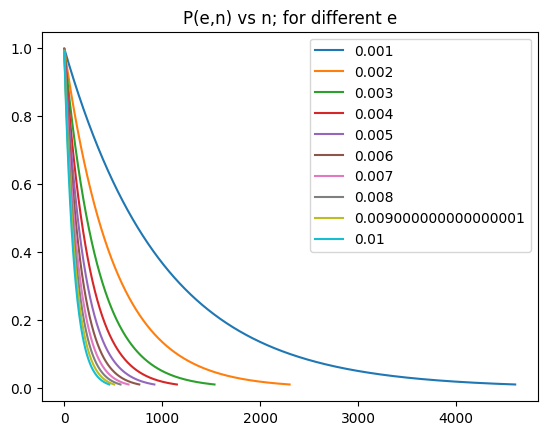

In [102]:
# Convergence in Probability to constant
# lim P(X_{n}-X>e)=0 
# X~Exp(n) -> 0 (constant)

def P(e,n):
    return 1 - expon.cdf(e, scale = 1/n)

for e in np.linspace(0.001, 0.01,10):
    vec = []
    n = 1
    while P(e,n)>0.01:
        #print(e, n, P(e,n))
        vec.append(P(e,n))
        n=n+1
    plt.plot(range(n-1), vec, label =e)
plt.title('P(e,n) vs n; for different e')
plt.legend()
plt.show()

In [ ]:
# Convergence in Probability to RV
# X ~ N(0,1)
# X_{n}= X + N(1/n,1/n)
# X_{n} -> X

def P(e,n):
    return 1 - expon.cdf(e, scale = 1/n)

for e in np.linspace(0.001, 0.01,10):
    vec = []
    n = 1
    while P(e,n)>0.01:
        #print(e, n, P(e,n))
        vec.append(P(e,n))
        n=n+1
    plt.plot(range(n-1), vec, label =e)
plt.title('P(e,n) vs n; for different e')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Uppernound E(X)/a for P(X>a) against a')

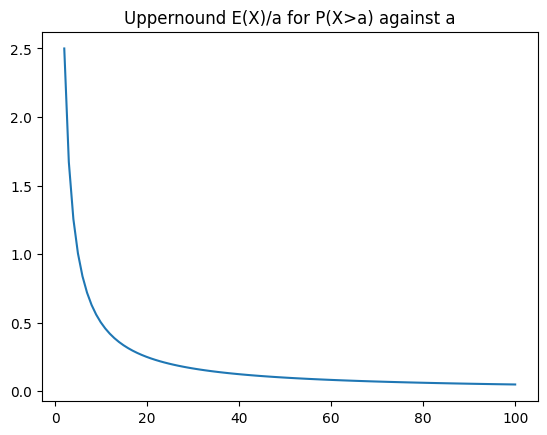

In [135]:
# Markov Inequality
# P(X>a)<E(X)/a if X>0.

n = 10
p = 0.5
from scipy.stats import binom
X = binom(n, p)
def P(X,a):
    return 1-X.cdf(a)

for a in np.linspace(1,100,100):
    if P(X,a)<X.mean()/a == False:
        print('!')
    
bounds = [X.mean()/a for a in np.linspace(2,100,100)]
plt.plot(np.linspace(2,100,100), bounds)
plt.title('Uppernound E(X)/a for P(X>a) against a')

Text(0.5, 1.0, 'Uppernound e^(s^2(b-a)^2/8) for E[e^(sX)] against s')

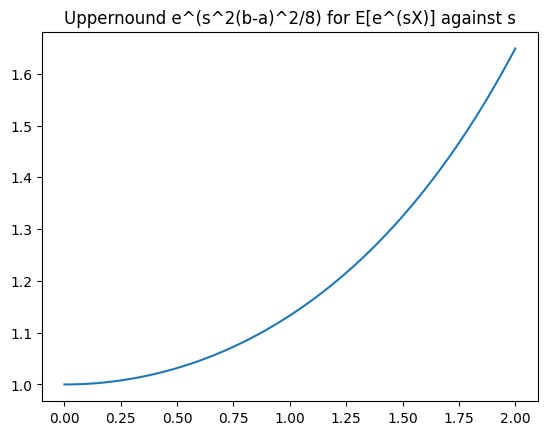

In [143]:
# Hoeffding Inequality
# X in [a,b]
# E(exp(sX)] < exp(s^2 (b-a)^2 / 8)

a = 5
b = 6
from scipy.stats import uniform
X = uniform(a, b)

def ub(s, a, b):
    return np.exp((s**2)* ((b-a) ** 2) * 1/8)

bounds = [ub(s, a, b) for s in np.linspace(0, 2, 100)]
plt.plot(np.linspace(0, 2, 100), bounds)
plt.title('Uppernound e^(s^2(b-a)^2/8) for E[e^(sX)] against s')

Text(0.5, 1.0, 'Uppernound for P(sum(X_{i} - E(X) > e) as function of n')

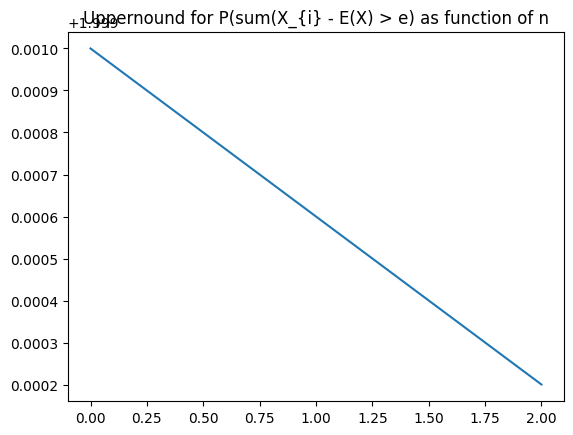

In [150]:
# Chernoff-Hoeffding Inequality
# X in [a,b]
# E(exp(sX)] < exp(s^2 (b-a)^2 / 8)

a = 0
b = 1
from scipy.stats import uniform
X = uniform(a, b)

def ub(e, a, b, n):
    return 2* np.exp(-(2*n*e**2)/((b-a) ** 2))
e = 0.01
bounds = [ub(e, a, b, n) for n in np.linspace(0, 2, 100)]
plt.plot(np.linspace(0, 2, 100), bounds)
plt.title('Uppernound for P(sum(X_{i} - E(X) > e) as function of n')